In [19]:
import numpy as np
from numpy.testing import assert_allclose
sys.path.append('../dataset')
import mnist
from PIL import Image
import matplotlib.pylab as plt
import pickle


In [20]:
# 3.2.4 シグモイド関数の実装
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [21]:
# 3.4.2 各層における信号伝達の実装
# 第1層目
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

assert W1.shape ==(2, 3)
assert X.shape ==(2,)
assert B1.shape ==(3,)

A1 = np.dot(X, W1) + B1
assert_allclose(A1, np.array([0.3, 0.7, 1.1]))

Z1 = sigmoid(A1)
assert_allclose(Z1, np.array([0.57444252, 0.66818777, 0.75026011]))


In [22]:
# 第2層目
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

assert Z1.shape ==(3,)
assert W2.shape ==(3, 2)
assert B2.shape ==(2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

assert_allclose(A2, np.array([0.51615984, 1.21402696]))
assert_allclose(Z2, np.array([0.62624937, 0.7710107]))


In [23]:
# 出力層
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

assert_allclose(A3, np.array([0.31682708, 0.69627909]))
assert_allclose(Y, np.array([0.31682708, 0.69627909]))


In [24]:
# 3.4.3　実装のまとめ
def init_network():
    network = {
        'W1' : np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]),
        'b1' : np.array([0.1, 0.2, 0.3]),
        'W2' : np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]),
        'b2' : np.array([0.1, 0.2]),
        'W3' : np.array([[0.1, 0.3], [0.2, 0.4]]),
        'b3' : np.array([0.1, 0.2]),
    }
    return network

def forward(network, x):
    W1, W2, W3, = network['W1'], network['W2'], network['W3']
    b1, b2, b3, = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

assert_allclose(y, np.array([0.31682708, 0.69627909]))


# ☆ここから発表資料

# 3.5 出力層の設計
- ニューラルネットワークは分類問題と回帰問題の両方に用いることができる。
- 分類問題
  - どのグループに属するのか予測する問題
  - 一般的にソフトマックス関数を使用する
- 回帰問題
  - 連続した数値を予測する問題
  - 一般的に恒等関数を使用する


## 3.5.1 恒等関数とソフトマックス関数


- ソフトマックス関数(3.10)
  - $exp$ はネイピア数
    - シグモイド関数でも使用されていた奴
    - ネイピア数は数学定数の一つであり、自然対数の底である。

$$ yk = \frac{exp(a_k)}{\sum_{i=1}^{n} exp(a_i)}$$ 

- ソフトマックス関数を図で表すと図3-22 のようになる
- 全ての入力信号から矢印による結びつきがある


In [25]:
# ソフトマックス関数の実装
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 指数関数
assert_allclose(exp_a, np.array([1.34985881, 18.17414537, 54.59815003]))

sum_exp_a = np.sum(exp_a) # 指数関数の和
assert sum_exp_a == 74.1221542101633

y = exp_a / sum_exp_a
assert_allclose(y, np.array([0.018211273295547534, 0.2451918129350739, 0.7365969137693785]))
assert sum(y) == 1 # 総和は1になる（3.5.3 ソフトマックス関数の特徴 の先取り）

In [26]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

## 3.5.2 ソフトマックス関数の実装上の注意
- ↑の実装は正しいが、Pythonの仕様として正しく動作しない場合がある
- それはオーバーフローするため
- 式3.11 のように式を変更する
  - 書けなかったので本を参照
  - 何らかの定数を足し算しても結果は変わらない
  - オーバーフローを回避するため入力信号の中で最大の値を使用することが一般的

In [27]:
# 既存のソフトマックス関数で実行
# 大きすぎる値になるためnp.nanが返ってくる
assert_allclose(softmax(np.array([1010, 1000, 990])), np.array([np.nan, np.nan, np.nan]))


In [28]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 入力信号の最大値を引く
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
# 入寮信号の最大値を引くことで正しく計算ができている
assert_allclose(softmax(np.array([1010, 1000, 990])), np.array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09]))

## 3.5.3 ソフトマックス関数の特徴
- 0から1.0までの実数になる
- 出力の総和が1になる → 確率として解釈可能
- ソフトマックス関数を適用しても各要素の大小関係は変わらない
- クラス分類では出力の一番大きいニューロンに相当するクラスだけを認識結果とする
- つまり、クラス分類を予測する場合、ソフトマックス関数を省略することが可能
  - 2番めに相当する郡？とか確率とか知りたい場合には必要。


In [29]:
y = softmax(np.array([0.3, 2.9, 4.0]))
assert_allclose(y, np.array([0.01821127329554753, 0.24519181293507392, 0.7365969137693786]))

# 総和が1になるため、出力を確率と解釈可能
assert np.sum(y) == 1.0


## 3.5.4 出力層のニューロンの数
- 出力層のニューロンの数は解くべき問題に応じて決める必要がある
- 10クラス分類問題では出力層のニューロンは10個に設定する

# 3.6 手書き数字認識
- 実践的な問題を解く
- 学習はすでに完了したものとして学習済みのパラメータを使用して「推論処理」だけを実装していく
    - 推論処理はニューラルネットワークの順方向伝播（forward propagation）とも言う


## 3.6.1 MNISTデータセット
- MNISTは機械学習の分野でもっと有名なデータセットのひとつ
- ニューヨーク大学、Google、Microsoft産？
    - [Webページから](http://yann.lecun.com/exdb/mnist/)参照
- 論文でも実験用のデータとしてよく登場する
- 0から9までの数字画像から構成される
- 訓練画像が60000枚、テスト画像が10000枚用意されている
- 一般的な使い方では訓練画像を使って学習を行い、学習したモデルでテスト画像に対してどれだけ正しく分類できるかを計測する
- 画像データは28 * 28のグレー画像
- 画像データは7, 2, 1のように対応するラベルが与えられている
- 本のリポジトリでmnist.pyというスクリプトを提供している
    - https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/dataset/mnist.py


In [30]:
# MNISTデータの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=False)
# normalizeオプション : 入力画像を0.0 - 0.1の値に正規化するかどうか（Falseの場合は0 - 255）
# flattenオプション : 入力画像を1次元配列にするかどうか（Falseの場合は 1*28*28の三次元配列）
# one_hot_labelオプション : one-hot表現にするか否か（Falseの際は1とか7数値を返す）
assert x_train.shape == (60000, 784)
assert t_train.shape == (60000,)
assert x_test.shape == (10000, 784)
assert t_test.shape == (10000,)


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


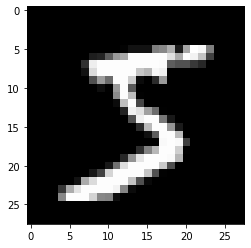

In [31]:
# 画像の表示
def img_show(img):
    # pil_img = Image.fromarray(np.uint8(img))
    # pil_img.show()
    # notebook だと表示できないのでmatplotlibを使用する
    plt.imshow(img, cmap='gray')

(x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
assert label == 5

assert img.shape == (784,)

# flattenで読み込んでいるため1次元のListとなっている。そのため、28*28のサイズ（List）に再変形
img = img.reshape(28, 28)
assert img.shape == (28, 28)

img_show(img)


In [36]:
# 3.6.2 ニューラルネットワークの推論処理
def get_data():
    (x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('../dataset/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3, = network['W1'], network['W2'], network['W3']
    b1, b2, b3, = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [37]:
x, t = get_data()
network = init_network()

accurary_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    # print(p, t[i], p == t[i])
    if p == t[i]:
        accurary_cnt += 1

print(str(float(accurary_cnt)), str(len(x)))
print(f"Accuracy: {str(float(accurary_cnt) / len(x))}")
# 'Accuracy: 0.9352' -> 93.52%正しく分類することができた

9352.0 10000
Accuracy: 0.9352


In [38]:
# 3.6.3 バッチ処理
x, _ = get_data()
network = init_network()
W1, W2, W3, = network['W1'], network['W2'], network['W3']

assert x.shape == (10000, 784)
assert x[0].shape == (784,)
assert W1.shape == (784, 50)
assert W2.shape == (50, 100)
assert W3.shape == (100, 10)


In [39]:
# バッチ処理の実装
x, _ = get_data()
network = init_network()

batch_size = 100
accurary_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accurary_cnt += np.sum(p == t[i:i+batch_size])

print(str(float(accurary_cnt)), str(len(x)))
print(f"Accuracy: {str(float(accurary_cnt) / len(x))}")


9352.0 10000
Accuracy: 0.9352


## 3.7 まとめ
- ニューラルネットワークはパーセプトロンと、ニューロンの信号が階層的に伝わるという点で同じ。
- 信号を活性化させる活性化関数に大きな違いがある。
- ニューラルネットワークでは活性化関数が滑らかに変化するシグモイド関数。
- パーセプトロンでは信号が急に変化するステップ関数を使用。
- この違いがニューラルネットワークの学習に重要になってくる。
    - 詳細は次章をお楽しみにね！